## Figure3_Geographical distribution of data in United States

In [9]:
import os
import pickle
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#importing basemap 
import mpl_toolkits
mpl_toolkits.__path__.append('C:/Users/hp/Anaconda3/pkgs/basemap-1.2.0-py37h0354792_4/Lib/site-packages/mpl_toolkits/')
os.environ["PROJ_LIB"] = "C:\\Users\\hp\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share"; 
from mpl_toolkits.basemap import Basemap

In [10]:
df_2013 = pd.read_pickle(os.path.join('C:\\Users\\hp\\Desktop\\FINAL YEAR PROJECT\\DATASET','df_2013_features.df'))
df_2014 = pd.read_pickle(os.path.join('C:\\Users\\hp\\Desktop\\FINAL YEAR PROJECT\\DATASET','df_2014_features.df'))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


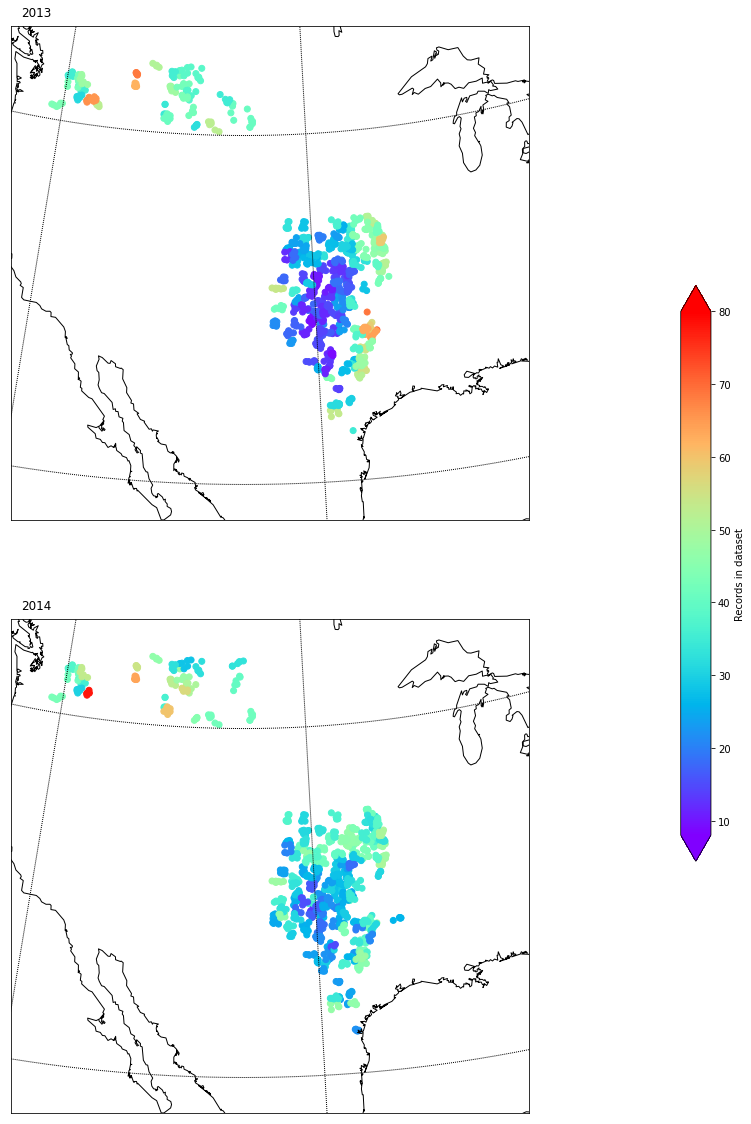

In [11]:
fig, ax = plt.subplots(2,1,figsize=(14, 20))

mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                lon_0=-105, area_thresh=10000,
                resolution = 'l',ax=ax[0])

for idx,df in enumerate([df_2013,df_2014]):
    
    mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                    urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                    lon_0=-105, area_thresh=10000,
                    resolution = 'l',ax=ax[idx])

    lng = df['longitude'].tolist()
    lat = df['latitude'].tolist()
    yld = df['yield'].tolist()
    x,y = mymap(lng, lat)

    im1 = mymap.scatter(x, y, c=yld, vmin=8, vmax=80, cmap=mpl.cm.get_cmap('rainbow'), zorder=2)

    mymap.drawparallels(np.arange(25,65,20))
    mymap.drawmeridians(np.arange(-120,-40,20))
    mymap.drawcoastlines()

    label = ['2013','2014']
    ax[idx].annotate(label[idx], xy=(0.02, 1.02), fontsize=12,xycoords='axes fraction')

cax1 = fig.add_axes( [0.92, 0.3, 0.03, 0.4])
cbar = plt.colorbar(im1,cax=cax1, orientation='vertical', extend='both', use_gridspec=True)
cbar.set_label('Records in dataset')

## Figure4_Scatter matrix  for the sample features

In [12]:
df_2013 = pd.read_csv('wheat.csv')
df_2013.head()

,apparentTemperatureMax,apparentTemperatureMin,temperatureMax,temperatureMin
0,36.49,8.15,36.49,14.38
1,37.86,8.19,37.86,14.39
2,35.93,10.34,35.93,16.45
3,36.01,8.16,36.01,14.48
4,37.81,11.41,37.81,16.11


<Figure size 576x576 with 0 Axes>

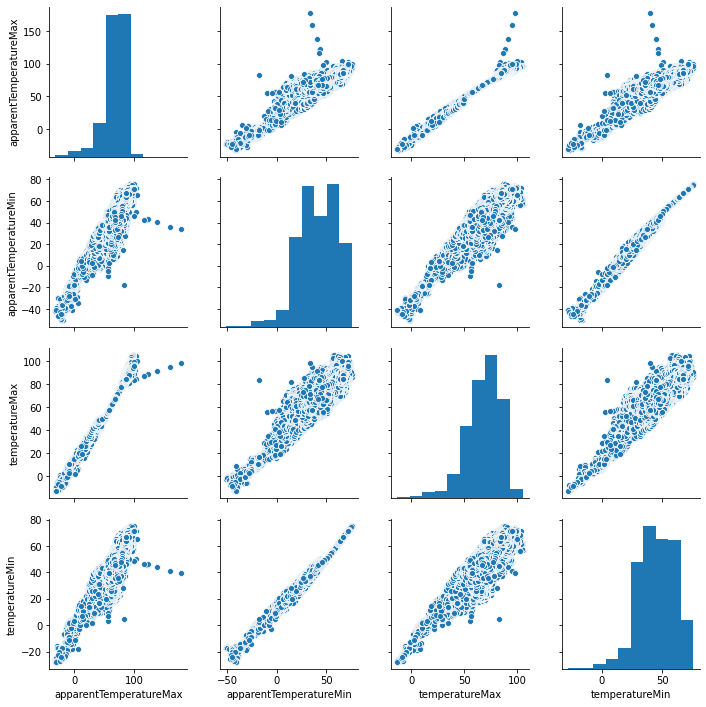

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
ax = sns.pairplot(df_2013)
plt.show()

## Figure5_Correlation matrix

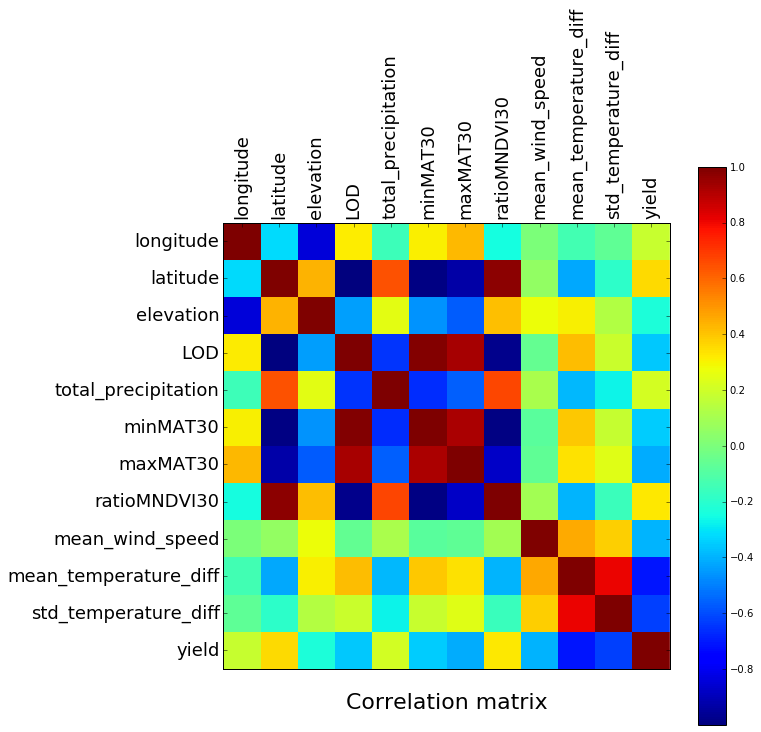

In [18]:
# Plot correlation matrix - Spearman
# Adjust labels to include all column names
fig, ax = plt.subplots(figsize=(10, 10))
# condition on which columns to carry over
corr =  df_2013.corr(method='spearman')
plt.imshow(corr,interpolation='none')
# Add colorbar
plt.colorbar()
plt.locator_params(axis='x', nticks=9)
labels = corr.columns
# Set custom tick labels - these two lines are where the deprecation warning originates
ax.set_xticklabels([''] + labels,rotation=90)
ax.set_yticklabels([''] + labels)
# Move x-axis labels to top
ax.xaxis.set_ticks_position('top')
# Set axis label size
ax.tick_params(labelsize=18)
# Adjust tick position x-axis
start, end = ax.get_xlim()
stepsize = 1.0
ax.set_xticks(np.arange(start+0.5,end+0.5, stepsize))
ax.set_xlim(start,end)
# Adjust tick position yaxis
start, end = ax.get_ylim()
stepsize = 1.0
ax.set_yticks(np.arange(end+0.5,start+0.5, stepsize))
ax.set_ylim(start,end)
# Add title
ax.set_title('Correlation matrix', fontsize=22,y=-0.1)
# Save figure
# plt.savefig(os.path.join(supp_dir,'correlation_matrix.png'), bbox_inches='tight')

## Figure6_Learning curve of stacked regressor vs random forest

In [24]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [25]:
from sklearn.ensemble import RandomForestRegressor

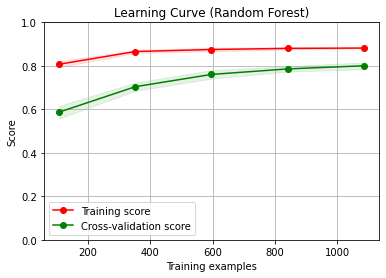

In [28]:
#RANDOM FOREST
#SCORING FUNCTION
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'r2'
from sklearn.model_selection import KFold
kf = KFold(n_splits=cv_k, shuffle=True)
X, y = X_train, y_train
title = "Learning Curve (Random Forest)"
est = RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt', 
                            min_samples_split=10, min_samples_leaf = 2, max_depth=7 )
plot_learning_curve(est, title, X, y, ylim=(0, 1.0), cv=kf, n_jobs=-1)
plt.show()


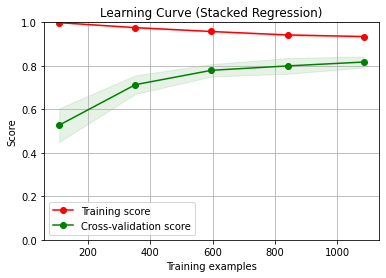

In [32]:
X, y = X_train, y_train
title = "Learning Curve (Stacked Regressor)"
estimators = [
('Random Forest', RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt',min_samples_split=10, min_samples_leaf = 5, max_depth=8)),
('Gradient boosted Regression1' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression2' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls'))
]
#Stack
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
plot_learning_curve(reg, title, X, y, ylim=(0, 1.0), cv=kf, n_jobs=-1)
plt.show()

## Figure7_Performance of stacked generalization regressor

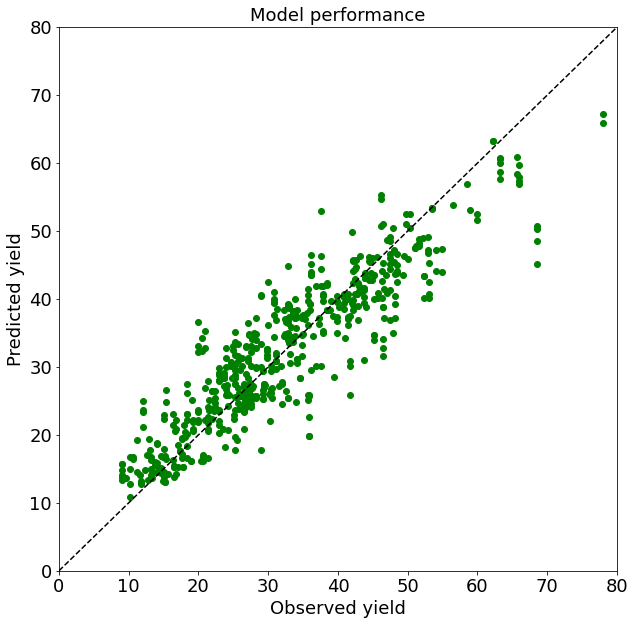

In [34]:
X, y = X_train, y_train
estimators = [
('Random Forest', RandomForestRegressor(n_estimators=300, n_jobs=-1, max_features= 'sqrt',min_samples_split=10, min_samples_leaf = 5, max_depth=8)),
('Gradient boosted Regression1' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression2' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')),
('Gradient boosted Regression' , GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0, loss='ls'))
]
#Stack
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))

y_pred = est.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(y_test,y_pred, color='green')
plt.plot([0,80],[0,80],'--', color='k')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

ax.set_title('Model performance',fontsize=18)
# ax.xlabels().set_fontsize(20)
ax.set_xlabel('Observed yield', fontsize=18)
ax.set_ylabel('Predicted yield', fontsize=18)
ax.tick_params(labelsize=18)

ratio_gbt = y_test/y_pred